In [1]:
#Import libraries
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statistics import mode
import numpy as np


### Points_Collision

In [5]:
# Read the data file and store it in a Pandas DataFrame.
points_collision_df = pd.read_csv(Path('CleaningData/points_collision.csv'))
points_collision_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,total_points_driver,average_col_acc
0,23782,989,20,6,5,3,1,1,1,25.0,58,29:33.3,5373283,53,4,01:26.5,220.782,1,636.00,0.04
1,23783,989,1,131,44,1,2,2,2,18.0,58,5.036,5378319,50,3,01:26.4,220.845,1,1555.50,0.01
2,23784,989,8,6,7,2,3,3,3,15.0,58,6.309,5379592,57,2,01:26.4,221.027,1,308.00,0.01
3,23785,989,817,9,3,8,4,4,4,12.0,58,7.069,5380352,54,1,01:25.9,222.128,1,458.00,0.04
4,23786,989,4,1,14,10,5,5,5,10.0,58,27.886,5401169,57,7,01:27.0,219.489,1,131.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,25400,1073,815,9,11,4,15,15,15,0.0,55,\N,\N,51,2,01:26.4,219.993,5,429.00,0.03
1615,25401,1073,849,3,6,16,\N,R,16,0.0,50,\N,\N,30,15,01:29.3,212.912,3,7.00,0.10
1616,25402,1073,841,51,99,14,\N,R,17,0.0,33,\N,\N,33,16,01:29.4,212.557,6,21.00,0.05
1617,25403,1073,847,3,63,17,\N,R,18,0.0,26,\N,\N,23,19,01:30.6,209.732,6,19.00,0.08


In [6]:
# Determine if there are any missing values
points_collision_df.isnull().sum()

resultId               0
raceId                 0
driverId               0
constructorId          0
number                 0
grid                   0
position               0
positionText           0
positionOrder          0
points                 0
laps                   0
time                   0
milliseconds           0
fastestLap             0
rank                   0
fastestLapTime         0
fastestLapSpeed        0
statusId               0
total_points_driver    0
average_col_acc        0
dtype: int64

In [8]:
# Determine data types for the DataFrame.
points_collision_df.dtypes

resultId                 int64
raceId                   int64
driverId                 int64
constructorId            int64
number                   int64
grid                     int64
position                object
positionText            object
positionOrder            int64
points                 float64
laps                     int64
time                    object
milliseconds            object
fastestLap              object
rank                     int64
fastestLapTime          object
fastestLapSpeed         object
statusId                 int64
total_points_driver     object
average_col_acc         object
dtype: object

In [9]:
points_collision_df.describe()

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,rank,statusId
count,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000
mean,24593.916615,1029.849907,654.443484,70.034589,28.008647,10.155652,10.494132,5.066399,54.329216,9.730080,9.167387
std,468.826216,24.518031,336.038982,85.504719,25.666323,5.818685,5.765005,7.218282,17.921190,5.881244,19.116254
min,23782.000000,989.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,24187.500000,1009.000000,807.000000,4.000000,8.000000,5.000000,5.500000,0.000000,52.000000,5.000000,1.000000
50%,24595.000000,1029.000000,830.000000,9.000000,18.000000,10.000000,10.000000,1.000000,56.000000,10.000000,3.000000
75%,24999.500000,1052.000000,842.000000,131.000000,44.000000,15.000000,15.000000,8.000000,67.000000,15.000000,11.000000
max,25404.000000,1073.000000,854.000000,214.000000,99.000000,20.000000,20.000000,27.000000,87.000000,20.000000,139.000000


In [10]:
points_collision_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,total_points_driver,average_col_acc
0,23782,989,20,6,5,3,1,1,1,25.0,58,29:33.3,5373283,53,4,01:26.5,220.782,1,636.00,0.04
1,23783,989,1,131,44,1,2,2,2,18.0,58,5.036,5378319,50,3,01:26.4,220.845,1,1555.50,0.01
2,23784,989,8,6,7,2,3,3,3,15.0,58,6.309,5379592,57,2,01:26.4,221.027,1,308.00,0.01
3,23785,989,817,9,3,8,4,4,4,12.0,58,7.069,5380352,54,1,01:25.9,222.128,1,458.00,0.04
4,23786,989,4,1,14,10,5,5,5,10.0,58,27.886,5401169,57,7,01:27.0,219.489,1,131.00,0.05


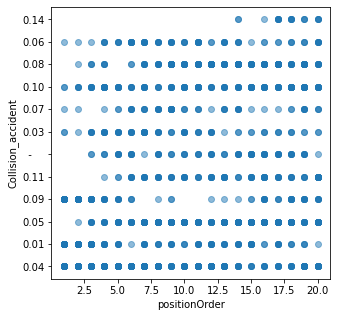

In [11]:
# Gráfico correlación entre choques y accidentes y resultado final
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=points_collision_df.positionOrder, y=points_collision_df.average_col_acc, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('Collision_accident');

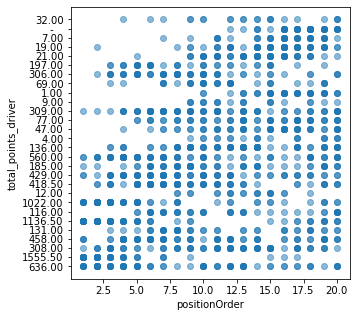

In [12]:
# Gráfico correlación entre puntos acumulados y resultado final
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=points_collision_df.positionOrder, y=points_collision_df.total_points_driver, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('total_points_driver');

### Constructor variables

In [13]:
#Read csv file
df = pd.read_csv(Path('CleaningData/formula1ps.csv'))
df.head()

,resultId,raceId,driverId,constructorId,pitstops,number,grid,position,positionText,positionOrder,...,fastestLapSpeed,statusId,status,driverRef,constructorRef,circuitId,name,year,circuitRef,Unnamed: 26
0,23783,989,1,131,1,44,1,2,2,2,...,220.845,1,Finished,hamilton,mercedes,1,Australian Grand Prix,2018,albert_park,NaN
1,23804,990,1,131,1,44,9,3,3,3,...,207.371,1,Finished,hamilton,mercedes,3,Bahrain Grand Prix,2018,bahrain,NaN
2,23825,991,1,131,1,44,4,4,4,4,...,202.559,1,Finished,hamilton,mercedes,17,Chinese Grand Prix,2018,shanghai,NaN
3,23842,992,1,131,3,44,2,1,1,1,...,205.012,1,Finished,hamilton,mercedes,73,Azerbaijan Grand Prix,2018,BAK,NaN
4,23862,993,1,131,1,44,1,1,1,1,...,211.77,1,Finished,hamilton,mercedes,4,Spanish Grand Prix,2018,catalunya,NaN


In [14]:
cons_win = df.groupby(["constructorId", "positionOrder"]).points.agg(['sum']).reset_index()
 

In [15]:
cons_win

,constructorId,positionOrder,sum
0,1,1,27.0
1,1,2,36.0
2,1,3,76.0
3,1,4,78.0
4,1,5,180.0
...,...,...,...
259,214,16,0.0
260,214,17,0.0
261,214,18,0.0
262,214,19,0.0


In [16]:
df2= pd.DataFrame(cons_win)
df2.to_csv('cons_win.csv')

Text(0, 0.5, 'constructorId')

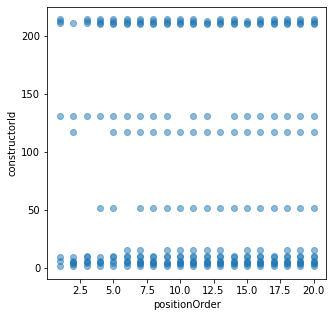

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=cons_win.positionOrder, y=cons_win.constructorId,alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('constructorId')

In [18]:
pints_agg = df.groupby('constructorId').points.agg(['sum']).reset_index()


In [19]:
print(pints_agg)

    constructorId     sum
0               1   684.0
1               3    31.0
2               4   394.0
3               5   118.0
4               6  1529.5
5               9  1740.5
6              10   111.0
7              15    48.0
8              51    78.0
9             117    77.0
10            131  2580.5
11            210   124.0
12            211   283.0
13            213   249.0
14            214   155.0


In [20]:
position_agg = df.groupby(['constructorId','positionOrder']).positionOrder.agg(['count']).reset_index().rename(columns = {'count':'totalpo'})


In [21]:
print(position_agg)

     constructorId  positionOrder  totalpo
0                1              1        1
1                1              2        2
2                1              3        5
3                1              4        7
4                1              5       18
..             ...            ...      ...
259            214             16        1
260            214             17        1
261            214             18        1
262            214             19        2
263            214             20        2

[264 rows x 3 columns]


Text(0, 0.5, 'constructorId')

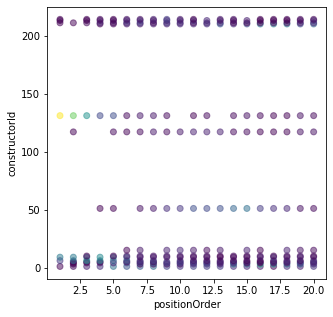

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=position_agg.positionOrder, y=position_agg.constructorId, c=position_agg.totalpo,alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('constructorId')



In [23]:
df2= pd.DataFrame(position_agg)
df2.to_csv('position_agg.csv')

### Constructor points per circuit

In [24]:
positions_agg = df.groupby(['constructorId','positionOrder','circuitId']).points.agg(['sum']).reset_index().sort_values('circuitId').rename(columns = {'sum':'sumpoints'})


In [25]:
print(positions_agg)

      constructorId  positionOrder  circuitId  sumpoints
435               5             18          1        0.0
612               9              3          1       15.0
425               5             15          1        0.0
1161            210             18          1        0.0
449               6              1          1       25.0
...             ...            ...        ...        ...
611               9              2         78       19.0
231               3             17         78        0.0
68                1              9         78        2.0
1063            131             20         78        0.0
919             117             10         78        1.0

[1389 rows x 4 columns]


In [26]:
df2= pd.DataFrame(positions_agg)
df2.to_csv('positioncircuit_agg.csv')

Text(0, 0.5, 'sumpoints')

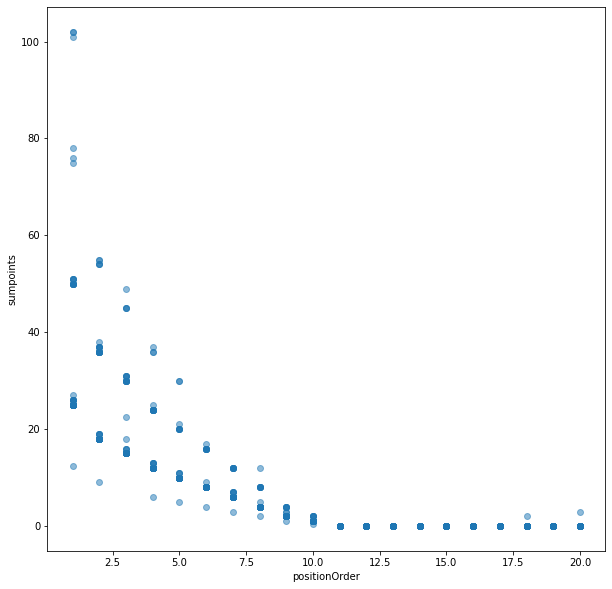

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.scatter(x=positions_agg.positionOrder, y=positions_agg.sumpoints, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('sumpoints')

### Constructor points per season

In [28]:
position_season_agg = df.groupby(['constructorId','positionOrder','year']).points.agg(['sum']).reset_index().sort_values('year').rename(columns = {'sum':'sumpoints'})


In [29]:
print(position_season_agg)

     constructorId  positionOrder  year  sumpoints
218              6             17  2018        0.0
298             10             16  2018        0.0
297             10             15  2018        0.0
119              4              8  2018       20.0
296             10             14  2018        0.0
..             ...            ...   ...        ...
355            117              5  2021       15.0
356            117              6  2021        8.0
357            117              7  2021       12.0
435            210             12  2021        0.0
542            214             20  2021        0.0

[543 rows x 4 columns]


Text(0, 0.5, 'sumpoints')

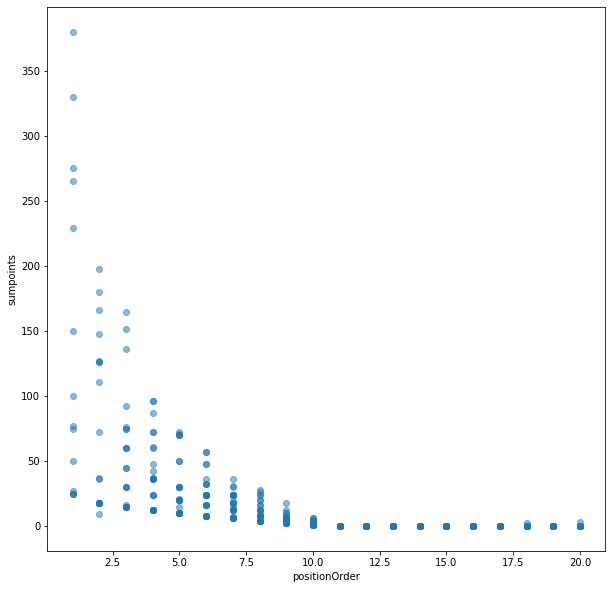

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.scatter(x=position_season_agg.positionOrder, y=position_season_agg.sumpoints, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('sumpoints')

In [31]:
df2= pd.DataFrame(position_season_agg)
df2.to_csv('position_season.csv')

### Pit-stops strategy

In [32]:
pits_agg = df.groupby(['constructorId','positionOrder','circuitId']).pitstops.agg(['sum']).reset_index().sort_values('circuitId').rename(columns = {'sum':'sumpits'})


In [33]:
pits_agg

,constructorId,positionOrder,circuitId,sumpits
435,5,18,1,0
612,9,3,1,1
425,5,15,1,3
1161,210,18,1,1
449,6,1,1,1
...,...,...,...,...
611,9,2,78,6
231,3,17,78,3
68,1,9,78,3
1063,131,20,78,1


Text(0, 0.5, 'sumpits')

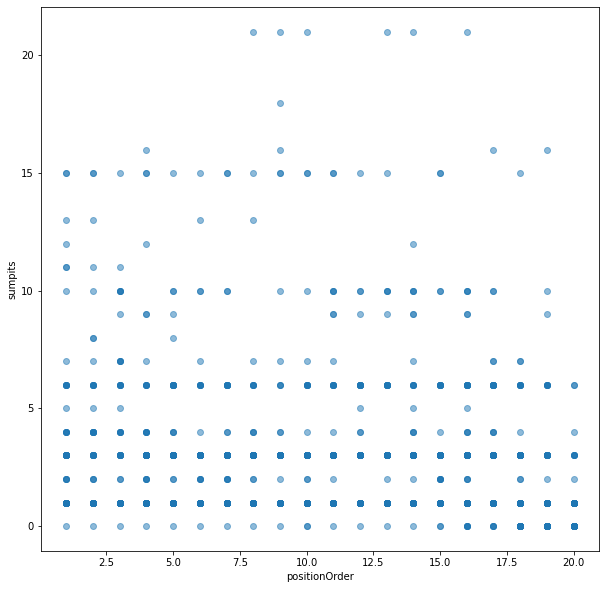

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.scatter(x=pits_agg.positionOrder, y=pits_agg.sumpits, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('sumpits')

In [35]:
df= pd.DataFrame(pits_agg)
df.to_csv('pits.csv')